# Preventing Credit Card Defaults

In this activity, you will use Keras to build a neural network model that predicts whether a credit card customer will default on their debt.

In [1]:
# Imports
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Step 1: Read the CSV file into a Pandas DataFrame.

In [2]:
# Read the cc_default.csv file into a Pandas DataFrame
file_path = "https://static.bc-edx.com/mbc/ai/m6/datasets/cc_default.csv"


# Review the DataFrame

df = pd.read_csv(file_path)
df.head()

,LIMIT_BAL,EDUCATION,MARITAL_STATUS,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,"""BILL_AMT4""",BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,1,24,2,2,-1,-1,-2,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,26,-1,2,0,0,0,2,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,34,0,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,1,37,0,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,2,1,57,-1,0,-1,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Step 2: Define the features set `X` by including all of the DataFrame columns except the “DEFAULT” column.

In [3]:
# Define features set X by selecting all columns but DEFAULT
X = df.copy().drop('DEFAULT', axis=1)

# Display the features DataFrame
X.head()

,LIMIT_BAL,EDUCATION,MARITAL_STATUS,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT3,"""BILL_AMT4""",BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,1,24,2,2,-1,-1,-2,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,26,-1,2,0,0,0,2,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,34,0,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,1,37,0,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,2,1,57,-1,0,-1,0,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


## Step 3: Create the target `y` by assigning the values of the DataFrame “DEFAULT” column.

In [4]:
# Define target set by selecting the DEFAULT column
y = df['DEFAULT']

# Display a sample y
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: DEFAULT, Length: 30000, dtype: int64

## Step 4: Create the training and testing sets using the `train_test_split` function from scikit-learn.

In [5]:
# Create training and testing datasets using train_test_split
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Step 5: Scale the features data using the `StandardScaler` from sklearn.

In [6]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [7]:
# Fit the scaler to the features training dataset
scaler.fit(X_train)

StandardScaler()

In [8]:
# Scale both the training and testing data from the features dataset
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Step 6: Create a neural network model with an input layer that consists of 22 inputs, one hidden layer, and an output layer. Use the `units` parameter to define 12 neurons for the hidden layer and a single output for the output layer. Use the ReLU activation function for the hidden layer and the sigmoid activation function for the output layer.

In [9]:
# Imports
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential


In [10]:
# Define the the number of inputs to the model
number_inputs = 22

# Define the number of hidden nodes for the model
number_hidden_nodes = 12

# Create the Sequential model instance
neuron = Sequential()

# Add a Dense layer specifying the number of inputs, the number of hidden nodes, and the activation function
neuron.add(Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer to the model specifying the number of output neurons and activation function
number_classes = 1
neuron.add(Dense(units=number_classes, activation="sigmoid"))

## Step 7: Display the model structure using the `summary` function.

In [11]:
# Display the Sequential model summary
neuron.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                276       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 289 (1.13 KB)
Trainable params: 289 (1.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##### The number of params for the first Dense layer is (22 x 12) + 12 = 276
##### The number of params for the second Dense layer is (12 x 1) + 1 = 13

## Step 8:  Compile the neural network model using the `binary_crossentropy` loss function, the `adam` optimizer, and the additional metric `accuracy`.

In [12]:
# Compile the Sequential model
neuron.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

## Step 9: Fit the model with 100 epochs using the training data.

In [13]:
# Fit the model using 100 epochs and the training data
model = neuron.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
704/704 [==============================] - 3s 2ms/step - loss: 0.5063 - accuracy: 0.7860
Epoch 2/100
704/704 [==============================] - 2s 2ms/step - loss: 0.4559 - accuracy: 0.8181
Epoch 3/100
704/704 [==============================] - 2s 2ms/step - loss: 0.4481 - accuracy: 0.8207
Epoch 4/100
704/704 [==============================] - 2s 2ms/step - loss: 0.4446 - accuracy: 0.8217
Epoch 5/100
704/704 [==============================] - 2s 2ms/step - loss: 0.4415 - accuracy: 0.8229
Epoch 6/100
704/704 [==============================] - 2s 2ms/step - loss: 0.4397 - accuracy: 0.8229
Epoch 7/100
704/704 [==============================] - 2s 3ms/step - loss: 0.4377 - accuracy: 0.8235
Epoch 8/100
704/704 [==============================] - 2s 3ms/step - loss: 0.4368 - accuracy: 0.8244
Epoch 9/100
704/704 [==============================] - 2s 2ms/step - loss: 0.4361 - accuracy: 0.8235
Epoch 10/100
704/704 [==============================] - 2s 2ms/step - loss: 0.4351 - accura

## Step 10: Plot the model’s loss function and accuracy over the 100 epochs.

In [15]:
model.history

{'loss': [0.5062586069107056,
  0.45591452717781067,
  0.44813868403434753,
  0.4445974826812744,
  0.4415423274040222,
  0.43965160846710205,
  0.43768003582954407,
  0.4367532432079315,
  0.43608012795448303,
  0.4350643754005432,
  0.43458375334739685,
  0.43378379940986633,
  0.4337121546268463,
  0.43314072489738464,
  0.4324967861175537,
  0.43241748213768005,
  0.4318525195121765,
  0.431972861289978,
  0.4315606653690338,
  0.4316134452819824,
  0.4312072992324829,
  0.4311588406562805,
  0.43091171979904175,
  0.4304400682449341,
  0.43032538890838623,
  0.43008968234062195,
  0.43009939789772034,
  0.42966926097869873,
  0.4297007918357849,
  0.4298717975616455,
  0.4292316436767578,
  0.42934632301330566,
  0.42896541953086853,
  0.42934587597846985,
  0.4288409650325775,
  0.4289734661579132,
  0.42881301045417786,
  0.42869439721107483,
  0.42824357748031616,
  0.42845720052719116,
  0.4283643960952759,
  0.4280693531036377,
  0.4282410144805908,
  0.42863771319389343,
  0

In [14]:
# Create a DataFrame using the model history and an index parameter
result_df = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))

<Axes: >

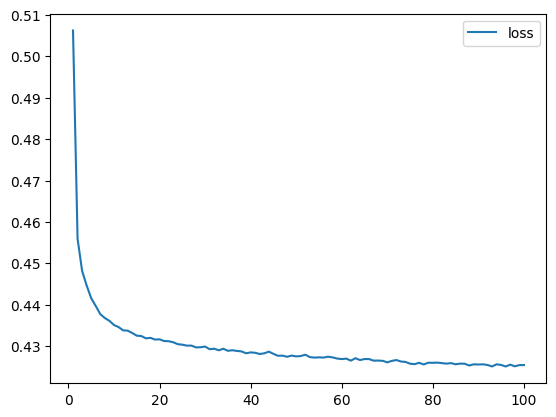

In [16]:
# Visualize the model plot where the y-axis displays the loss metric
result_df.plot(y="loss")

<Axes: >

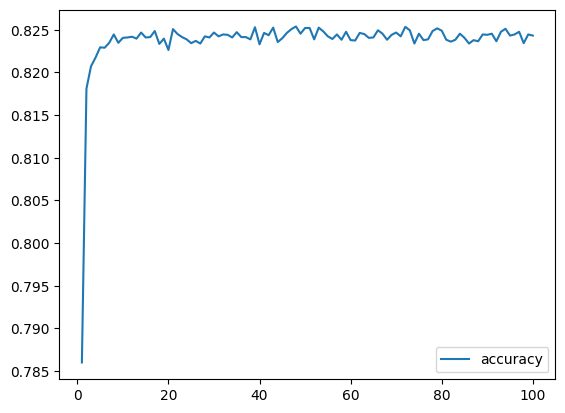

In [17]:
# Visualize the model plot where the y-axis displays the accuracy metric
result_df.plot(y="accuracy")

## Step 11: Evaluate the model using testing data and the `evaluate` method.

In [18]:
# Evaluate the model using testing data
model_loss, model_accuracy = neuron.evaluate(X_test_scaled, y_test, verbose=2)

# Display evaluation results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

235/235 - 0s - loss: 0.4501 - accuracy: 0.8067 - 486ms/epoch - 2ms/step
Loss: 0.4500914514064789, Accuracy: 0.8066666722297668


## Step 12: Use the model and your scaled `X` test data to predict the `y` values for the test data.

In [19]:
# Make predictions on test data
predictions = (neuron.predict(X_test_scaled) > 0.5).astype("int32")

235/235 [==============================] - 0s 2ms/step


## Step 13: Create a dataframe that includes the predicted `y` values and the actual `y` values. Display a sample of this dataframe.

In [21]:
# Create a DataFrame to compare the predictions with the actual values
results = pd.DataFrame({"predictions": predictions.ravel(), "actual": y_test})

# Display sample data
results

,predictions,actual
22894,0,0
4855,0,1
17699,0,0
4914,1,0
17466,0,0
...,...,...
13768,0,0
26805,0,0
1208,0,1
9167,0,1


## Step 14: Use the results of steps 12 and 13 to consider how well your model performed on the unseen test data. How accurate were the results? Can you think of any ways you might improve the model accuracy?